<div id="image">
<img src="https://www.imt-atlantique.fr/sites/default/files/logo_mt_0_0.png" WIDTH=280 HEIGHT=280>
</div>
<div id="subject">
<CENTER>
</br>
<font size="4"></br> UE Artificial Inteligence: Project 1</font></br></div>
</CENTER>
<CENTER>
<font size="4"></br>April 2019</font></br></div>
</CENTER>
<CENTER>
<span style="color:blue">gustavo.rodrigues-dos-reis@imt-atlantique.fr</span>
</CENTER>
<CENTER>
<span style="color:blue">tales-marra@imt-atlantique.fr</span>
</CENTER>
</div>

 # Adaboost Classifier

AdaBoost is a shortened name for Adaptive Boosting, it can be called a an exemple of Machine Learning 
Meta-Algorithm once it uses Machine Learning techniques to improve the performance of weak other algorithms (called "weak learners") that are in their turn a form of Machine Learning.

In the case of the AdaBoost the most classical application of this algorithm is illustrated by junctioning it with decision trees. The general idea of the algorithm is shown below:

The following equation can represent the action of AdaBoost,

\begin{equation*}
F_{N}(x)=\sum_{n=1}^{N} f_{n}(x)
\end{equation*}

where each $f_{n}$ is a classifier that will have a certain x as a input and the output will be the class predict by it.

For each $f_{n}$  it will be produced a hypothesis about what class belongs the samples that are present in the dataset, denoted here by $h(x_{i})$. For each iteration $t$ one of the classifiers will receive a coefficient $\alpha_{t}$ that minimizes the sum training error $E_{t}$. In the next equation $E[t]$ is a given error function, $F_{t-1}(x_{i})$ is the bootest classifier generated by the previous iteration and $\alpha_{t}h({x_{i}})$ is the learner that is being considered for adding to the final classifier:

\begin{equation*}
E_{t}=\sum_{i}E[F_{t-1}(x_{i}))+\alpha_{t}h({x_{i}})]
\end{equation*}

At a instant $t$ of the training process, a certain weight $w_{t,i}$ will be assigned for each instance $i$ of the dataset and it will be equal to the current error $E(F_{t-1}(x_{i}))$ on that instance. 

<div id="image">
<img src="https://i.imgur.com/OXNqb7N.png" WIDTH=560 HEIGHT=560>
</div>
<CENTER>
</br>
<font size="1"></br> Source:https://i.ytimg.com/vi/BoGNyWW9-mE/maxresdefault.jpg</font></br></div>
</CENTER>



Resuming the process in a few steps:

1- For each oberservation $i$ is assigned a weight $\frac{1}{N}$ (supposing a uniform distribution of the data - N being the total number of samples)

2- Train a weak model, in our demonstrations a decision tree;

3- For each sample if the value in the model was correctly predicted the weight $w_{i}$ is increased, otherwise is decreased;

4- Train again the model with a great priority given by the greater weights;

5- Repeat the steps 3 and 4 untill a certain predefined number of models were trained.

In [1]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
import numpy as np
import matplotlib.pyplot as plt

In this demonstration of the AdaBoost we chose to utilise the available generating dataset tool make_blobs in the 
python library. The number of different classes is defined as 4.

In [2]:
position,classes=make_blobs(n_samples=200,n_features=2,centers=4)

Here we visualize the data.

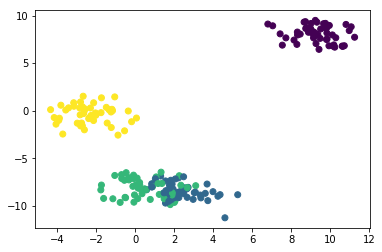

In [3]:
plt.scatter(position[:,0], position[:,1], c=classes)
plt.show()

The dataset is divised in 80% for training and 20% for validation.

In [4]:
x_train,x_test, y_train, y_test=train_test_split(position,classes,test_size=0.2)

We use then the AdaBoost classifier implemented in the Scikit-learning library.

The parameter n_estimators is a integer number for the quantity of iteractions the boosting algorithm will execute, learning_rate shrinks each classifier by the the number specified in this parameter, existing a trade-off between this booth parameters.

The algorithm boosted in this classifier is the Decision Tree Classifier with depth one, also called stump

In [5]:
classifier_adaboost = AdaBoostClassifier(base_estimator=None, n_estimators=100, learning_rate=0.7, random_state=None)
classifier_adaboost.n_classes=4

In [6]:
classifier_adaboost.fit(x_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=0.7, n_estimators=100, random_state=None)

We present the score of correct classifications in the both dataset the test datased and the trained one

In [7]:
print('Test Score: ',classifier_adaboost.score(x_test,y_test))
print('Train Score: ',classifier_adaboost.score(x_train,y_train))

Test Score:  0.875
Train Score:  0.93125


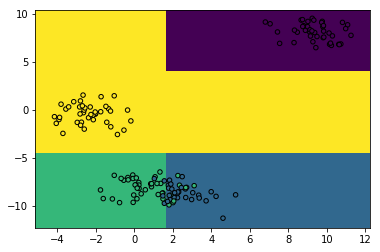

In [8]:
from matplotlib.colors import ListedColormap
def plot_boundaries(classifier_adaboost,X,Y,h=0.2):
    x0_min, x0_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x1_min, x1_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    x0, x1 = np.meshgrid(np.arange(x0_min, x0_max,h),
                         np.arange(x1_min, x1_max,h))
    dataset = np.c_[x0.ravel(),x1.ravel()]
    Z = classifier_adaboost.predict(dataset)

    # Put the result into a color plot
    Z = Z.reshape(x0.shape)
    plt.figure()
    plt.pcolormesh(x0, x1, Z)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=Y,
                edgecolor='k', s=20)
    plt.xlim(x0.min(), x0.max())
    plt.ylim(x1.min(), x1.max())
plot_boundaries(classifier_adaboost,x_train,y_train)

Here are presented the Confusion Matrices for the Training and Test Sets.

By definition,"_a confusion matrix (Kohavi and Provost, 1998) contains information about actual and predicted classifications done by a classification system. Performance of such systems is commonly evaluated using the data in the matrix_".

Therefore, analyzing the confusion matrix, it's possible to see how the algorithm is performing in the task of classification.

Training Set:
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        43
          1       0.79      0.94      0.86        35
          2       0.94      0.78      0.85        41
          3       1.00      1.00      1.00        41

avg / total       0.94      0.93      0.93       160

[[43  0  0  0]
 [ 0 33  2  0]
 [ 0  9 32  0]
 [ 0  0  0 41]]


Text(0,0.5,'Predicted class')

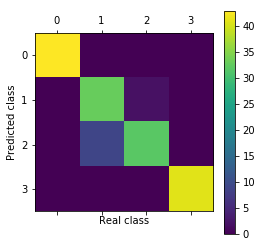

In [9]:
from sklearn.metrics import classification_report,confusion_matrix

y_pred_train = classifier_adaboost.predict(x_train)
report = classification_report(y_true=y_train,y_pred=y_pred_train)
matrix = confusion_matrix(y_true=y_train,y_pred=y_pred_train)
print("Training Set:")
print(report)
print(matrix)
plt.matshow(matrix)
plt.colorbar()
plt.xlabel("Real class")
plt.ylabel("Predicted class")

Test Set:
             precision    recall  f1-score   support

          0       1.00      1.00      1.00         7
          1       0.92      0.73      0.81        15
          2       0.67      0.89      0.76         9
          3       1.00      1.00      1.00         9

avg / total       0.89      0.88      0.88        40

[[ 7  0  0  0]
 [ 0 11  4  0]
 [ 0  1  8  0]
 [ 0  0  0  9]]


Text(0,0.5,'Predicted class')

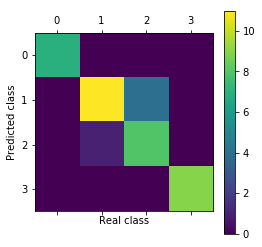

In [10]:
y_pred_test = classifier_adaboost.predict(x_test)
report = classification_report(y_true=y_test,y_pred=y_pred_test)
matrix = confusion_matrix(y_true=y_test,y_pred=y_pred_test)
print("Test Set:")
print(report)
print(matrix)
plt.matshow(matrix)
plt.colorbar()
plt.xlabel("Real class")
plt.ylabel("Predicted class")

# Adaboost in a different Dataset

Now the same algorithm will be applied to a different Dataset, with much more noise, to evaluate the performance. 

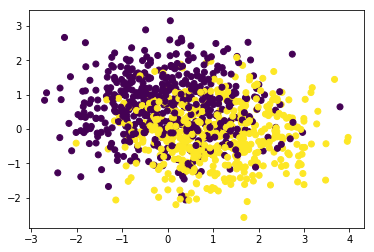

In [11]:
from sklearn.datasets import make_moons

n=1000
X,Y=make_moons(noise=0.8,random_state=0,n_samples=n)

plt.scatter(X[:,0], X[:,1], c=Y)
plt.show()

In [12]:
x_train,x_test, y_train, y_test=train_test_split(X,Y,test_size=0.2)

In [13]:
classifier_adaboost1 = AdaBoostClassifier(base_estimator=None, n_estimators=200, learning_rate=0.6, random_state=None)
classifier_adaboost1.n_classes=2

In [14]:
classifier_adaboost1.fit(x_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=0.6, n_estimators=200, random_state=None)

In [15]:
print('Test Score: ',classifier_adaboost1.score(x_test,y_test))
print('Train Score: ',classifier_adaboost1.score(x_train,y_train))

Test Score:  0.725
Train Score:  0.77375


Training Set:
             precision    recall  f1-score   support

          0       0.78      0.74      0.76       391
          1       0.77      0.80      0.78       409

avg / total       0.77      0.77      0.77       800

[[290 101]
 [ 80 329]]


Text(0,0.5,'Predicted class')

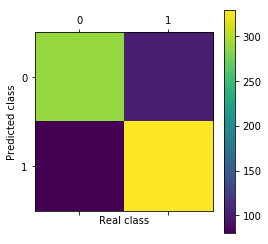

In [16]:
from sklearn.metrics import classification_report,confusion_matrix

y_pred_train = classifier_adaboost1.predict(x_train)
report = classification_report(y_true=y_train,y_pred=y_pred_train)
matrix = confusion_matrix(y_true=y_train,y_pred=y_pred_train)
print("Training Set:")
print(report)
print(matrix)
plt.matshow(matrix)
plt.colorbar()
plt.xlabel("Real class")
plt.ylabel("Predicted class")

Test Set:
             precision    recall  f1-score   support

          0       0.77      0.71      0.74       109
          1       0.68      0.75      0.71        91

avg / total       0.73      0.72      0.73       200

[[77 32]
 [23 68]]


Text(0,0.5,'Predicted class')

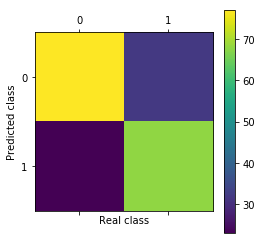

In [17]:
y_pred_test = classifier_adaboost1.predict(x_test)
report = classification_report(y_true=y_test,y_pred=y_pred_test)
matrix = confusion_matrix(y_true=y_test,y_pred=y_pred_test)
print("Test Set:")
print(report)
print(matrix)
plt.matshow(matrix)
plt.colorbar()
plt.xlabel("Real class")
plt.ylabel("Predicted class")

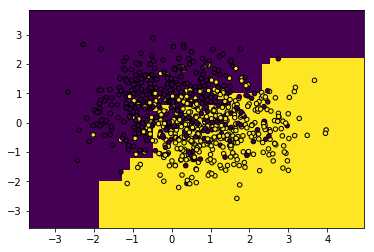

In [18]:
from matplotlib.colors import ListedColormap
def plot_boundaries(classifier_adaboost1,X,Y,h=0.2):
    x0_min, x0_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x1_min, x1_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    x0, x1 = np.meshgrid(np.arange(x0_min, x0_max,h),
                         np.arange(x1_min, x1_max,h))
    dataset = np.c_[x0.ravel(),x1.ravel()]
    Z = classifier_adaboost1.predict(dataset)

    # Put the result into a color plot
    Z = Z.reshape(x0.shape)
    plt.figure()
    plt.pcolormesh(x0, x1, Z)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=Y,
                edgecolor='k', s=20)
    plt.xlim(x0.min(), x0.max())
    plt.ylim(x1.min(), x1.max())
plot_boundaries(classifier_adaboost1,x_train,y_train)

An advantage of AdaBoost is that this algorithm is less sensible to overfitting, however it is more sensible to noise and outliers in the data, as it's possible to see in this example.

Best k: 91, Best test accuracy 50.0%


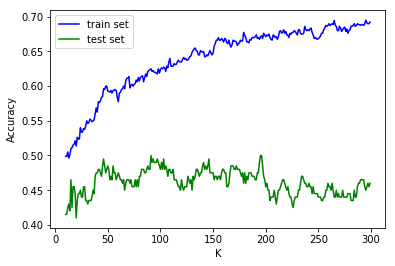

In [33]:
train_acc = list()
test_acc = list() 
test_ks = range(10,300)


for k in range(10,300):
    local_classifier = AdaBoostClassifier(base_estimator=None, n_estimators=k, learning_rate=0.6, random_state=None)
    local_classifier.n_classes=2 
    local_classifier.fit(x_train,y_train)
    train_acc.append(local_classifier.score(x_train,y_train))
    test_acc.append(local_classifier.score(x_test,y_test))

plt.plot(test_ks,train_acc,color="blue",label="train set")
plt.plot(test_ks,test_acc,color="green",label="test set")
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.legend()
print("Best k: {}, Best test accuracy {}%".format(test_ks[np.argmax(test_acc)],max(test_acc)*100))

Best k: 0.6399999999999997, Best test accuracy 52.0%


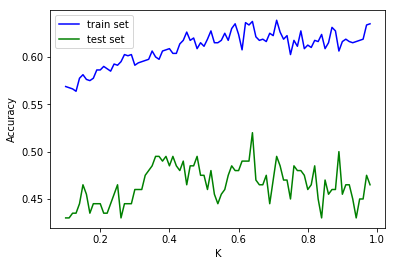

In [34]:
train_acc = list()
test_acc = list() 
test_ks = np.arange(0.1,0.99,0.01)


for k in np.arange(0.1,0.99,0.01):
    local_classifier = AdaBoostClassifier(base_estimator=None, n_estimators=100, learning_rate=k, random_state=None)
    local_classifier.n_classes=2 
    local_classifier.fit(x_train,y_train)
    train_acc.append(local_classifier.score(x_train,y_train))
    test_acc.append(local_classifier.score(x_test,y_test))

plt.plot(test_ks,train_acc,color="blue",label="train set")
plt.plot(test_ks,test_acc,color="green",label="test set")
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.legend()
print("Best k: {}, Best test accuracy {}%".format(test_ks[np.argmax(test_acc)],max(test_acc)*100))

In the first test, varying the number of classifiers (_n estimators_) it is possible to see that the classifier starts to overfit, as well as in the second test varying only the _learning rate_. 

# Adaboost Applied to the Pyrat Game

Now it is time to apply the algorithm to our current problem in the Pyrat Game, that is trying to predict the outcome of an specific game given just the _initial condition_ of the maze (position of the players and position of the pieces of cheese).

Here we import some useful libraries to our project, which include the one necessary to make the split between the train and the validation sets, and also the classifier itself.

As this is the default version of the algorithm, the classifiers used are the so called _stumps_ (one level decision trees), but it is also possible to use other types of classifiers by changing the attribute called _estimators_ .

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier

In the next cell, we load the dataset already generated.

In [20]:
filename = "dataset1.npz"
loaded_npz = np.load(filename)
x = loaded_npz["x"]
y = loaded_npz["y"]

Here we use the function _train_test_split_ in order to split the data we've acquired into training and validation datasets. X corresponds to the initial maps of the Pyrat game, and Y tells us the winner of the game.

The elements _Yi_ can assume three values:<br>
-1 - The game was won by the Rat <br>
  0 - The game was a draw <br>
  1 - The game was won by the Python<br>

In [21]:
x_train,x_test, y_train, y_test=train_test_split(x,y,test_size=0.2)
print(x_train.shape,y_train.shape)

(800, 315) (800,)


The _Adaboost_ classifier works as an object, and therefore it needs to be instatiated with the desired attributes.

In [22]:
classifier_adaboost = AdaBoostClassifier(base_estimator=None, n_estimators=100, learning_rate=0.4, random_state=None)
classifier_adaboost.n_classes=3

Here the model is trained:

In [23]:
classifier_adaboost.fit(x_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=0.4, n_estimators=100, random_state=None)

Here are shown the results of the training and the validation.

In [24]:
print("Train Score: ",classifier_adaboost.score(x_train,y_train))
print("Test Score: ",classifier_adaboost.score(x_test,y_test))

Train Score:  0.60875
Test Score:  0.485


Here are presented the Confusion Matrices for the Training and Test Sets.

Training Set:
             precision    recall  f1-score   support

       -1.0       0.61      0.68      0.64       344
        0.0       0.69      0.09      0.15       105
        1.0       0.61      0.70      0.65       351

avg / total       0.62      0.61      0.58       800

[[233   2 109]
 [ 48   9  48]
 [104   2 245]]


Text(0,0.5,'Predicted class')

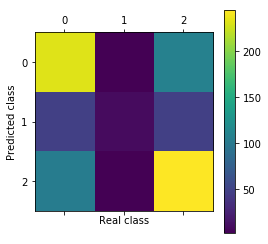

In [25]:
from sklearn.metrics import classification_report,confusion_matrix

y_pred_train = classifier_adaboost.predict(x_train)
report = classification_report(y_true=y_train,y_pred=y_pred_train)
matrix = confusion_matrix(y_true=y_train,y_pred=y_pred_train)
print("Training Set:")
print(report)
print(matrix)
plt.matshow(matrix)
plt.colorbar()
plt.xlabel("Real class")
plt.ylabel("Predicted class")

Test Set:
             precision    recall  f1-score   support

       -1.0       0.53      0.52      0.52        93
        0.0       0.17      0.05      0.07        21
        1.0       0.46      0.56      0.51        86

avg / total       0.46      0.48      0.47       200

[[48  2 43]
 [ 7  1 13]
 [35  3 48]]


Text(0,0.5,'Predicted class')

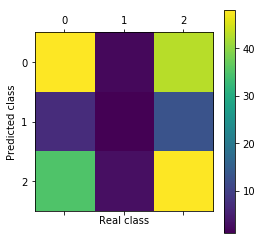

In [26]:
y_pred_test = classifier_adaboost.predict(x_test)
report = classification_report(y_true=y_test,y_pred=y_pred_test)
matrix = confusion_matrix(y_true=y_test,y_pred=y_pred_test)
print("Test Set:")
print(report)
print(matrix)
plt.matshow(matrix)
plt.colorbar()
plt.xlabel("Real class")
plt.ylabel("Predicted class")

References:

FREUND,Yoav; SCHAPIRE,Robert E.  A Short Introduction to Boosting - AT&T Labs  Research Shannon Laboratory. Available in: http://www.site.uottawa.ca/~stan/csi5387/boost-tut-ppr.pdf 

https://en.wikipedia.org/wiki/AdaBoost

http://www2.cs.uregina.ca/~dbd/cs831/notes/confusion_matrix/confusion_matrix.html